In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
# Check for duplicate rows in the dataframe
df.duplicated().sum()

0

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
num_cols = []
cat_cols = []
# Classify columns into numerical and categorical based on their data types
for fe in df.columns:
    if df[fe].dtype in ['int64','float64']:
        num_cols.append(fe)
    else:
        cat_cols.append(fe)

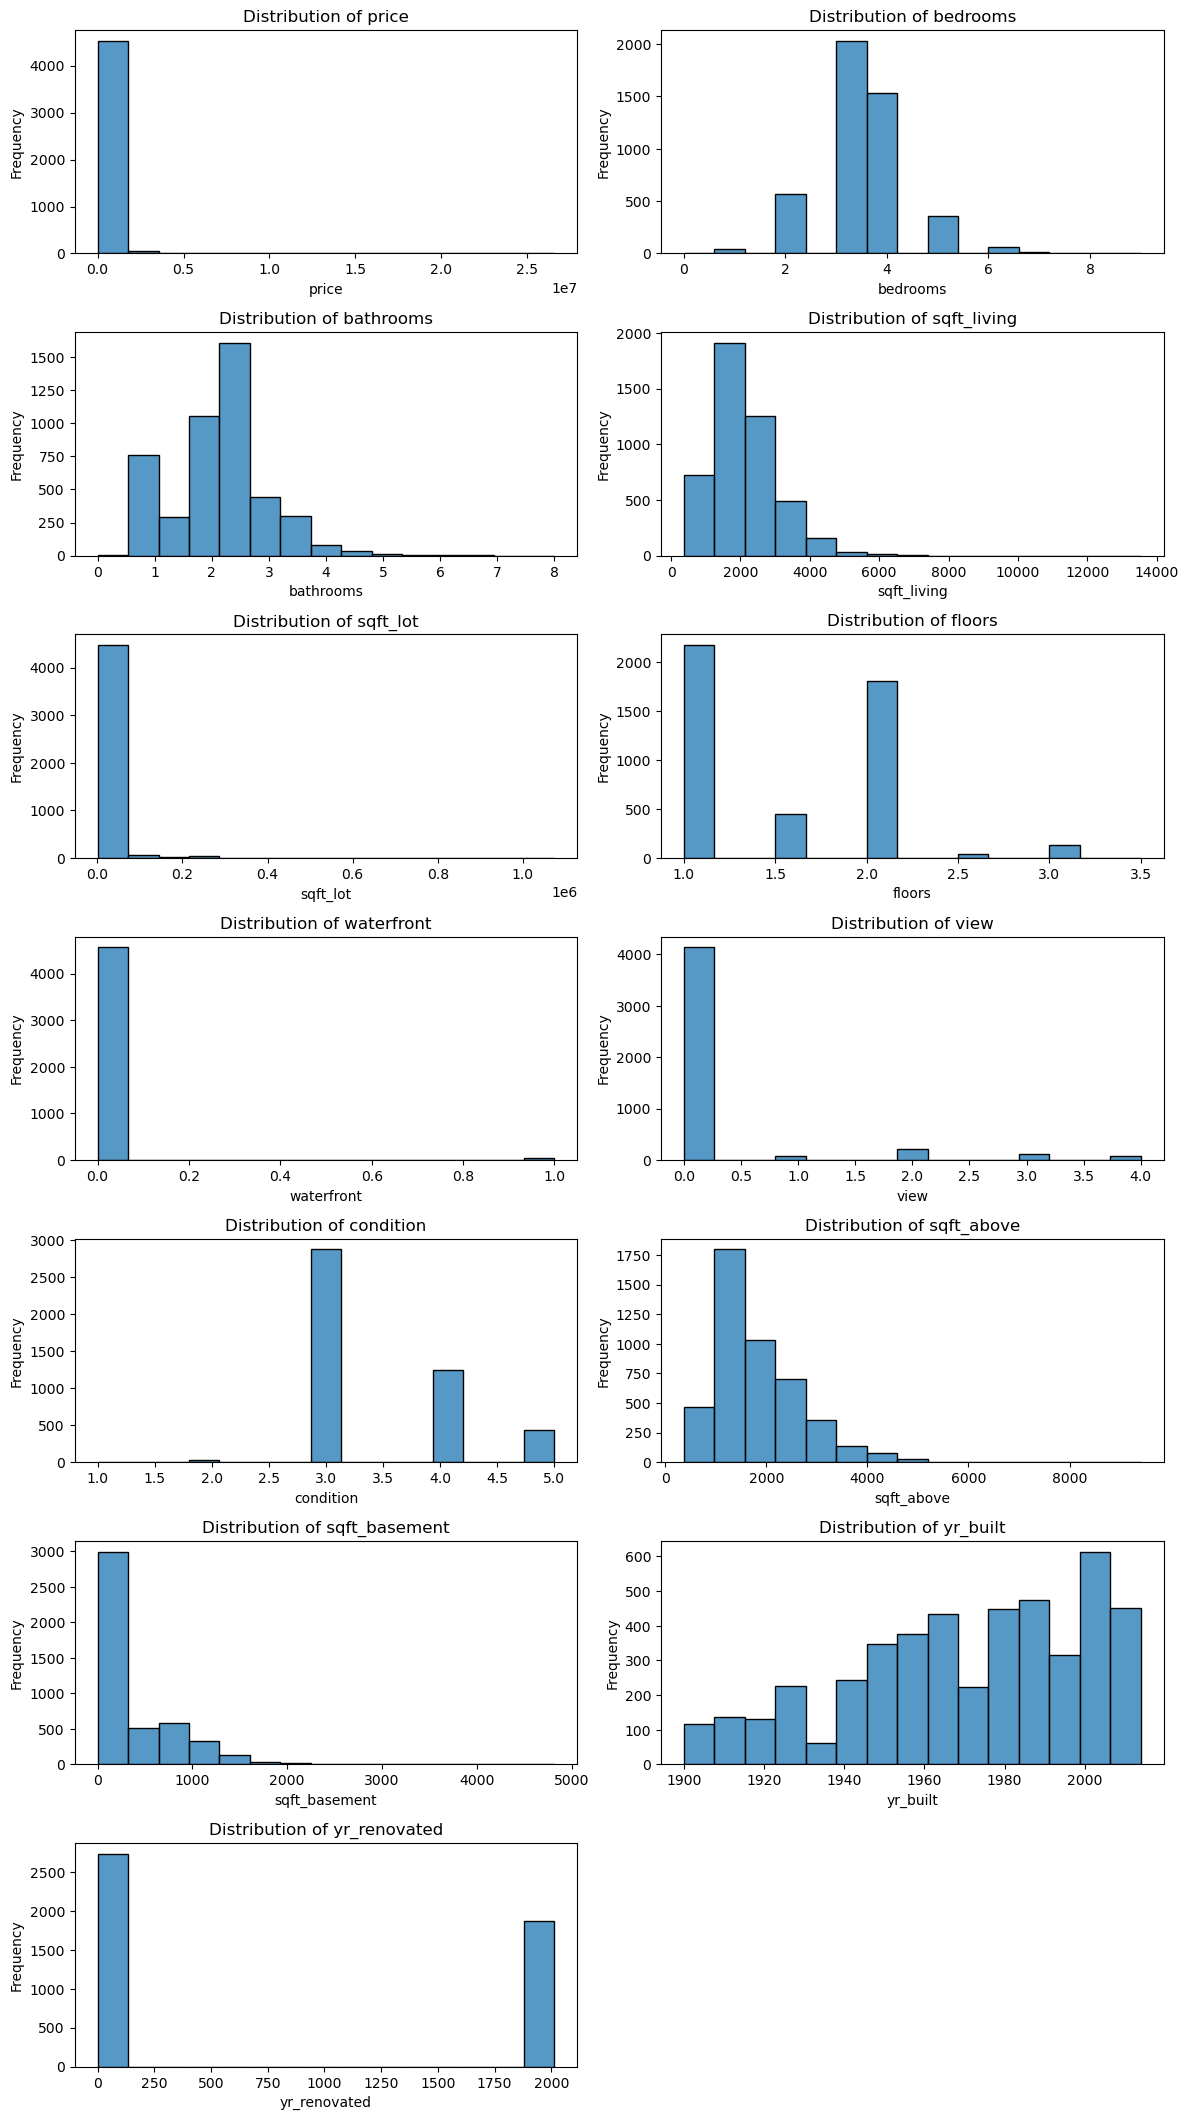

In [7]:
# Plot histograms for all numerical features to visualize their distributions
plt.figure(figsize=(12,len(num_cols)*3))
for i, fe in enumerate(num_cols,1):
    plt.subplot(len(num_cols),2,i)
    sns.histplot(data=df,x=fe,bins=15,palette='viridis')
    plt.title(f'Distribution of {fe}')
    plt.xlabel(fe)
    plt.ylabel('Frequency')

plt.tight_layout()   # Adjusting layout to prevent overlap
plt.show()

In [8]:
# Identify columns that may contain outliers
outlier_cols = ['price','sqft_living','sqft_lot']

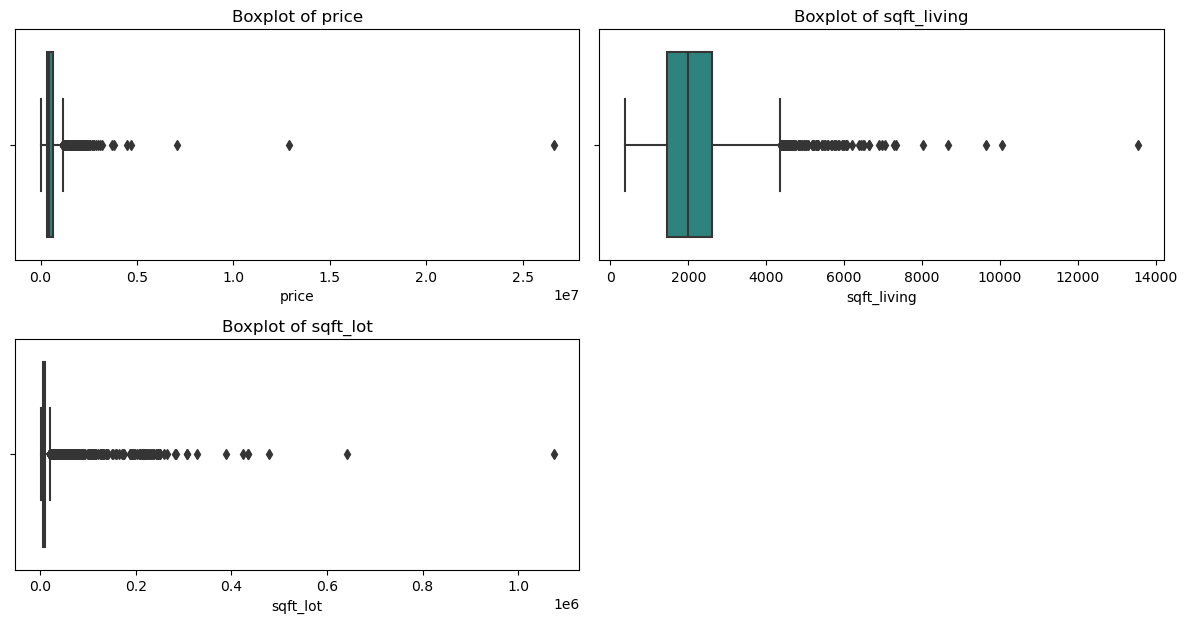

In [9]:
# Plot boxplots for selected columns to visualize potential outliers
plt.figure(figsize=(12,len(outlier_cols)*3))
for i, fe in enumerate(outlier_cols,1):
    plt.subplot(len(outlier_cols),2,i)
    sns.boxplot(data=df, x=fe, palette='viridis')
    plt.title(f'Boxplot of {fe}')
    plt.xlabel(fe)

plt.tight_layout()
plt.show()

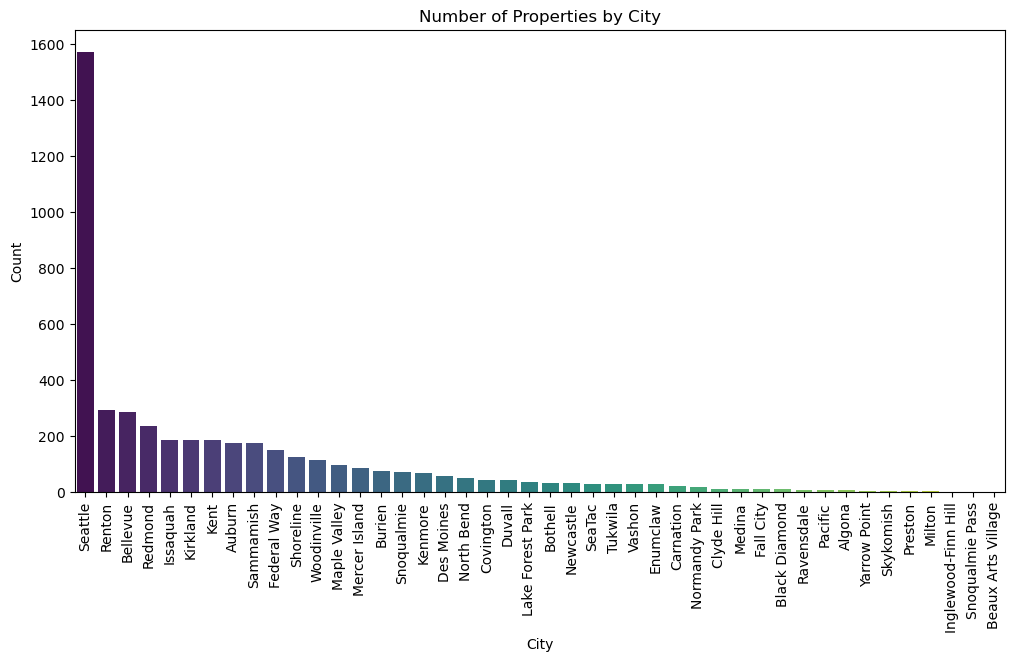

In [10]:
# Plot bar chart showing the number of properties by city
plt.figure(figsize=(12, 6))
city_counts = df['city'].value_counts()
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Number of Properties by City")
plt.ylabel("Count")
plt.xlabel("City")
plt.show()

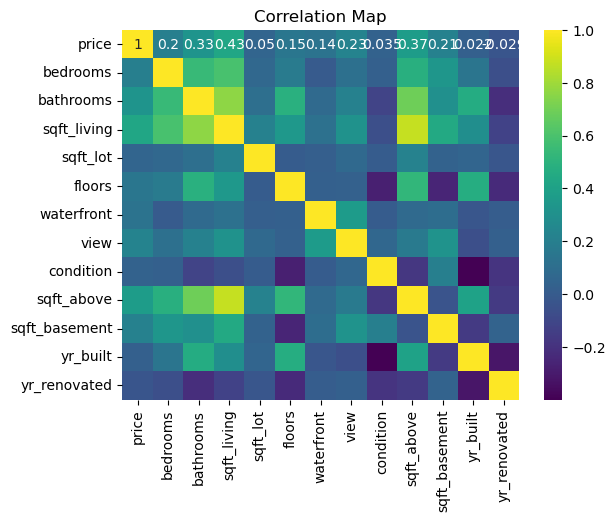

In [11]:
# Generate a heatmap to visualize correlations between numerical features
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Correlation Map")
plt.show()

In [12]:
# List of columns to filter for outlier removal
columns_to_filter = ['price','sqft_living', 'sqft_lot']

In [13]:
# Remove outliers using the IQR method
for column in columns_to_filter:
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)   # Third quartile
    IQR = Q3 - Q1                          # Interquartile range
    lower_bound = Q1 - 1.5 * IQR           # Lower bound for outlier detection
    upper_bound = Q3 + 1.5 * IQR           # Upper bound for outlier detection

    # Remove rows where the column value is outside the bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [14]:
df['age'] = 2024 - df['yr_built']

In [15]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [16]:
# Extract state information from the 'statezip' column using regex
df['state'] = df['statezip'].str.extract(r'([A-Z]+)')

In [17]:
df = df.drop(['street', 'statezip', 'yr_built', 'yr_renovated', 'date'], axis=1)

In [18]:
# Convert categorical variables into dummy/indicator variables (one-hot encoding)
df = pd.get_dummies(df, columns=['city', 'state', 'country'], dtype='int64', drop_first=True)

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,...,0,1,0,0,0,0,0,0,0,0


In [20]:
df.shape

(3798, 55)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3798 entries, 0 to 4599
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     3798 non-null   float64
 1   bedrooms                  3798 non-null   float64
 2   bathrooms                 3798 non-null   float64
 3   sqft_living               3798 non-null   int64  
 4   sqft_lot                  3798 non-null   int64  
 5   floors                    3798 non-null   float64
 6   waterfront                3798 non-null   int64  
 7   view                      3798 non-null   int64  
 8   condition                 3798 non-null   int64  
 9   sqft_above                3798 non-null   int64  
 10  sqft_basement             3798 non-null   int64  
 11  age                       3798 non-null   int64  
 12  renovated                 3798 non-null   int64  
 13  city_Auburn               3798 non-null   int64  
 14  city_Bea

In [24]:
# Standardize selected numerical features to have mean=0 and variance=1
df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'age']] = scaler.fit_transform(df[['bedrooms', 'bathrooms', 'sqft_living', 
                                                                                                         'sqft_lot', 'floors','waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'age']])

In [25]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,-0.367351,-0.794692,-0.833261,0.203026,0.019140,-0.039778,-0.253753,-0.670496,-0.465458,...,0,0,1,0,0,0,0,0,0,0
2,342000.0,-0.367351,-0.075721,-0.003645,1.351127,-0.901053,-0.039778,-0.253753,0.814369,0.400965,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,-0.367351,0.283765,0.094784,0.236601,-0.901053,-0.039778,-0.253753,0.814369,-0.964753,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,0.771587,0.643250,0.010416,0.939404,-0.901053,-0.039778,-0.253753,0.814369,-0.759161,...,0,0,0,0,0,0,0,0,0,0
5,490000.0,-1.506289,-1.513663,-1.480081,-0.232882,-0.901053,-0.039778,-0.253753,-0.670496,-1.140974,...,0,1,0,0,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('price',axis=1)
y = df['price']

In [28]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression

In [30]:
lasso = LassoCV(cv=5) # Initialize LassoCV with cross-validation set to 5 folds
lasso.fit(X_train, y_train)

LassoCV(cv=5)

In [31]:
coef = pd.Series(lasso.coef_,index=X_train.columns)

In [32]:
print('Selected features by Lasso:', coef[coef != 0].index) # Print non-zero coefficients indicating selected features

Selected features by Lasso: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'age', 'renovated',
       'city_Auburn', 'city_Bellevue', 'city_Bothell', 'city_Burien',
       'city_Covington', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw',
       'city_Federal Way', 'city_Issaquah', 'city_Kenmore', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
       'city_Newcastle', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_SeaTac', 'city_Seattle', 'city_Shoreline', 'city_Tukwila',
       'city_Woodinville'],
      dtype='object')


In [33]:
# Filter the original data to keep only the selected features
filtered_data = df[coef[coef != 0].index]

In [34]:
# Split filtered data into training and testing sets again for modeling with selected features
X_train, X_test, y_train, y_test = train_test_split(filtered_data, y, test_size=0.2, random_state=42)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, accuracy_score

In [38]:
# Calculate R-squared score
r2 = round(r2_score(y_test, y_pred),2)
# Calculate Mean Squared Error (MSE)
mse = round(mean_squared_error(y_test, y_pred),2)
# Calculate Root Mean Squared Error (RSME)
rsme = round(mse ** 0.5,2)
mae = round(mean_absolute_error(y_test,y_pred),2)

In [39]:
r2, mse, mae, rsme

(0.63, 16981863631.21, 87154.17, 130314.48)

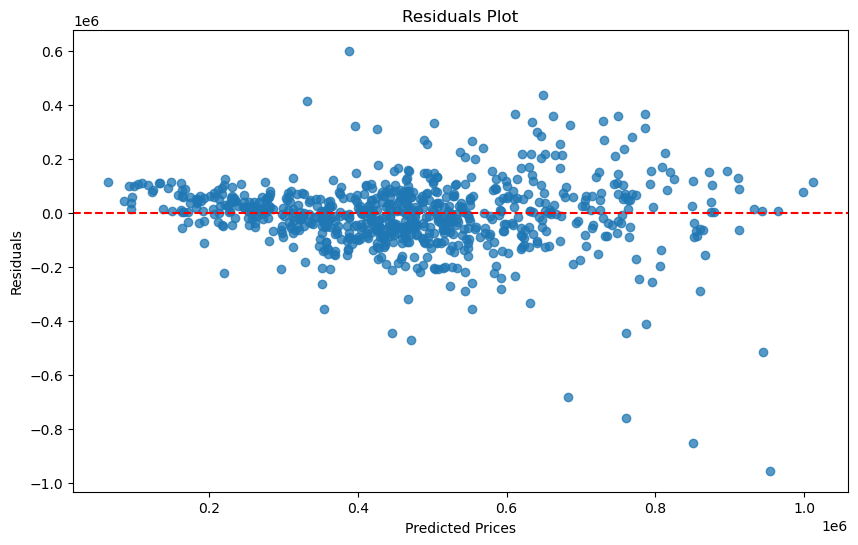

In [40]:
# Residual Plot: Visualize residuals to check for patterns indicating model fit issues
residual = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residual,alpha=0.75)
plt.axhline(0,color = 'red',linestyle = '--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

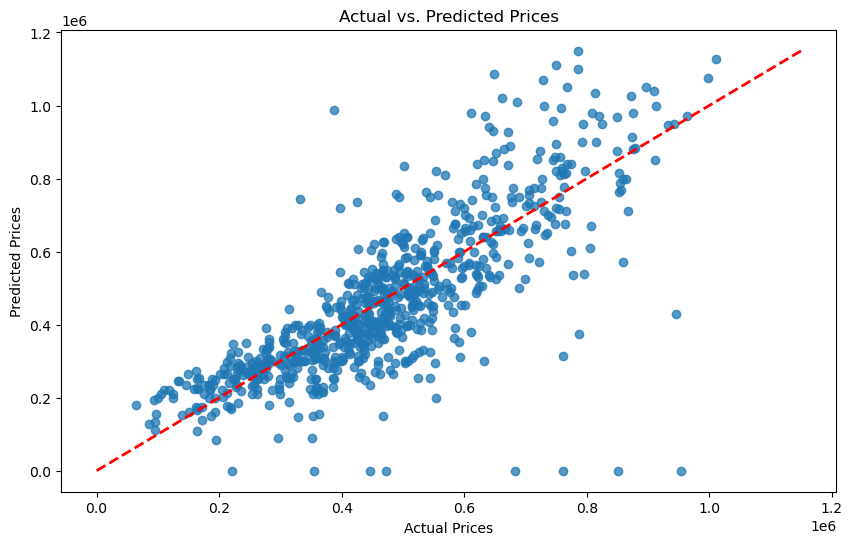

In [41]:
# Actual vs. Predicted Price plot: Assess how well predictions match actual 
plt.figure(figsize = (10,6))
plt.scatter(y_pred, y_test, alpha=0.75)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'--r',lw=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()